In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
td = pd.read_csv('..\\Titanic\\train.csv')

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
td.drop(['Name'],axis = 1,inplace = True)
td.drop(['Cabin'],axis = 1,inplace=True)
td.drop(['Ticket'],axis = 1,inplace=True)

In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [10]:
td.dropna(inplace=True)
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB
None


In [11]:
#Dummy data
dummies = []
cols = ['Sex','Embarked','Pclass']
for col in cols:
    dummies.append(pd.get_dummies(td[col]))

In [12]:
td_dummies = pd.concat(dummies,axis = 1)

In [13]:
td_dummies.head()

,female,male,C,Q,S,1,2,3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [14]:
td = pd.concat((td,td_dummies),axis = 1)

In [15]:
td = td.drop(['Sex','Embarked','Pclass'],axis = 1)

In [16]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
female         712 non-null uint8
male           712 non-null uint8
C              712 non-null uint8
Q              712 non-null uint8
S              712 non-null uint8
1              712 non-null uint8
2              712 non-null uint8
3              712 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 44.5 KB


In [17]:
td['Age'] = td['Age'].interpolate()

In [18]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
female         712 non-null uint8
male           712 non-null uint8
C              712 non-null uint8
Q              712 non-null uint8
S              712 non-null uint8
1              712 non-null uint8
2              712 non-null uint8
3              712 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 44.5 KB


In [19]:
X = td.iloc[:,td.columns!='Survived']
y = td.iloc[:,td.columns=='Survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [21]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

C:\Users\saket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_test.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [22]:
Pred_y = model_lr.predict(X_test)

In [28]:
model_lr.score(X_test,y_test)

0.7476635514018691

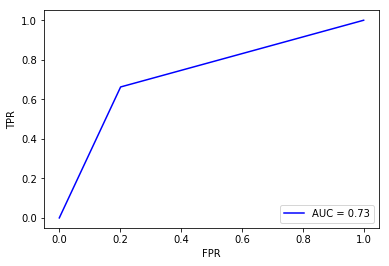

In [33]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,Pred_y)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
Pred_y_rf = model_rf.predict(X_test)
model_rf.score(X_test,y_test)

..\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
..\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.780373831775701

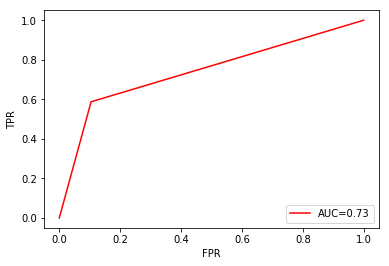

In [42]:
fpr_rf,tpr_rf,threshold = metrics.roc_curve(y_test,Pred_y_rf)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr_rf,tpr_rf,'r',label = 'AUC=%0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [46]:
gb = GradientBoostingClassifier(n_estimators=)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

C:\Users\saket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7336448598130841

In [50]:
test_data = pd.read_csv('C:\\Users\\saket\\Desktop\\Online Courses\\Python code\\Titanic\\test.csv')
test_data.drop(['Name'],axis = 1,inplace = True)
test_data.drop(['Cabin'],axis = 1,inplace=True)
test_data.drop(['Ticket'],axis = 1,inplace=True)

dummies = []
cols = ['Sex','Embarked','Pclass']
for col in cols:
    dummies.append(pd.get_dummies(test_data[col]))

test_data_dummies = pd.concat(dummies,axis = 1)
test_data = pd.concat((test_data,test_data_dummies),axis = 1)
test_data = test_data.drop(['Sex','Embarked','Pclass'],axis = 1)

test_data['Age'] = test_data['Age'].interpolate()

In [53]:
test_data['Fare']=test_data['Fare'].interpolate()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
female         418 non-null uint8
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
1              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [57]:
y_pred = model_lr.predict(test_data)
output = np.column_stack((test_data.iloc[:,0],y_pred))
output_res = pd.DataFrame(output.astype('int'),columns = ['PassengerID','Survived'])
output_res.to_csv('C:\\Users\\saket\\Desktop\\Online Courses\\Python code\\Titanic\\Predictions_lr.csv',index=False)